# Assignment 1 Part B

# Question 1: 
## How does the frequency of mental health illness and attitudes towards mental vary by geographic location, and what are the strongest predictors of mental health illness and specific attitudes towards mental health in the workplace?

- most of responses in both dataframe in 2014 and 2016 are in the United State, it is because the US can many world tech companies such as google, facebook
- stakeholders: people who have career in tech industry, employer in tech industry

## Data

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
import statistics as stat
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from subprocess import check_output

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

In [7]:
survey14 = pd.read_csv('survey_2014.csv')
survey14.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
survey16 = pd.read_csv('survey_2016.csv')
survey16.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [9]:
survey14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [10]:
survey14.describe(include = 'all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 15:24:47,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Summary of data types in survey 2014:
Total responses: 1259
- numeric: Age(integer)
- Object: Everything else
Gender has many distinct responses. I grouped into 3 categories.
Age have weird value. I change them into mean value.
The following variables have null values that need to be addressed
- state: this should be null only country is not US
- self_employed: there is only 18 missing value >> I will fill it with majority of responses.
- work-interfere: there are 264 missing values. The question begins with "if you have mention health condition, ...?"
- comment: optional only 164 response. I will drop it because it is not answer my question and lots of missing value. It can be useful in the future to do text analysis.

In [11]:
survey16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
Are you self-employed?                                                                                                                                                              1433 non-null int64
How many employees does your company or organization have?                                                                                                                          1146 non-null object
Is your employer primarily a tech company/organization?                                                                                                                             1146 non-null float64
Is your primary role within your company related to tech/IT?                                                                                                                        263 non-null float64
Does your employer provide mental health benefits as part of healthcare coverage?        

In [12]:
survey16.describe(include = 'all')

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
count,1433.000000,1146,1146.000000,263.000000,1146,1013,1146,1146,1146,1146,...,1433,1433,1433.000000,1430,1433,840,1433,851,1433,1433
unique,NaN,6,NaN,NaN,4,3,3,3,3,6,...,5,5,NaN,70,53,47,53,48,264,3
top,NaN,26-100,NaN,NaN,Yes,No,No,No,I don't know,Somewhat easy,...,Not applicable to me,Often,NaN,Male,United States of America,California,United States of America,California,Back-end Developer,Sometimes
freq,NaN,292,NaN,NaN,531,354,813,531,742,281,...,557,538,NaN,610,840,130,851,141,263,757
mean,0.200279,NaN,0.770506,0.942966,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,34.286113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.400349,NaN,0.420691,0.232350,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.290931,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
features=(list(survey16))
print(len(features))
survey16.shape

63


(1433, 63)

Summary of survey 2016
- there are 1433 responses
- from 63 questions, there are 13 question that have less than 50% responses, so I drop those questions.
- age have impossible value such as negative value and more than 100 >> I replace it with median
- gender have many unique value, so I group into 3 categories, which includes male, female, and trans
- no_employee >> I change into the maximum number of each class

### Cleaning Data

#### Data Cleaning for survey 2014

In [14]:
survey14['Age'] = pd.to_numeric(survey14['Age'],errors='coerce')
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
survey14['Age'] = survey14['Age'].apply(age_process)
survey14['Age'] = survey14['Age'].replace(np.nan, survey14.Age.median() )

In [15]:
survey14['work_interfere'] = survey14['work_interfere'].replace(np.nan, 'Don\'t know' )
print(survey14['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [16]:
#there are only 18 self-employed missing value, which is only 0.014% of responses
# the majority of self-employed response is no >> change null value to "no"
survey14['self_employed'] = survey14['self_employed'].replace(np.nan, 'No')
print(survey14['self_employed'].unique())

['No' 'Yes']


In [17]:
survey14 = survey14.drop(['Timestamp','state','comments'], axis=1)
# timestamp is not useful for analysis
# state is only consist when country is 'United State', so I ignore it for now
# comments have lots of missing value because it is optional, and it can be useful to do text analysis, buy not use in this analysis

In [18]:
survey14['Gender'].unique()
#too many gender type >> group into 3 categories (male, female, trans)

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [19]:
#clean 'Gender'
#Slower case all columm's elements
gender = survey14['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = survey14['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne",\
             "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer",\
             "ostensibly male, unsure what that really means", "p", "a little about you"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in survey14.iterrows():

    if str.lower(col.Gender) in male_str:
        survey14['Gender'].replace(to_replace=col.Gender, value='Male', inplace=True)

    if str.lower(col.Gender) in female_str:
        survey14['Gender'].replace(to_replace=col.Gender, value='Female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        survey14['Gender'].replace(to_replace=col.Gender, value='Trans', inplace=True)


survey14['Gender'].value_counts()

# majority of respondant is male (more than 90%) >> is gender affected, female, trans

Male      991
Female    247
Trans      21
Name: Gender, dtype: int64

In [20]:
survey14.isnull().sum()
# state only exist where country is the united state >> left the state have null value

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

#### Cleaning data for survey 2016

In [21]:
# drop the question that have less than 50% of responsdant
count=0
major_not_ans=[]
for col in features:
    #print(col,sum(pd.isnull(survey16[col])))
    if(sum(pd.isnull(survey16[col]))>721):
        count=count+1
        major_not_ans.append(col)
        #survey16.drop([col],axis=1,inplace=True)
print(len(major_not_ans))

13


In [22]:
survey16.drop([i for i in major_not_ans], axis = 1, inplace = True)

In [23]:
# drop state where work, and live, and reason
# drop describtion for job
extra_feature=['What US state or territory do you work in?','Why or why not?','Why or why not?.1','What US state or territory do you live in?']
one_more=['Which of the following best describes your work position?']

In [24]:
survey16.drop([i for i in extra_feature], axis =1, inplace = True)

In [25]:
survey16.drop(one_more, axis=1, inplace = True)

In [26]:
# country where live and work is subtitute, so I drop one
survey16.drop(['What country do you live in?'], axis =1, inplace=True)

In [27]:
survey16.drop(['Are you self-employed?', 'Do you have previous employers?'],axis=1,inplace=True)

In [28]:
real_features=(list(survey16))
print(len(real_features))
# now columns is 42

42


In [29]:
# REMOVING SELF EMPLOYED 287 NAN
count=0
for index,col in enumerate(real_features):
    idx=survey16.index[survey16[col].isnull()]
    #response.drop(idx,inplace=True)
    if(len(idx)==287):
        #print(index,idx)
        k=idx
        count+=1
#print(count)    12
#print(k)
#idx=response.index[response['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].isnull()]
survey16.drop(k,inplace=True)
survey16.shape

(1146, 42)

In [30]:
# Group of people not answering the same questions So removing them
count=0
for index,col in enumerate(real_features):
    idx=survey16.index[survey16[col].isnull()]
    #response.drop(idx,inplace=True)
    if(len(idx)==131):
        #print(index,idx)
        k=idx
        count+=1
# print(count) 11
# print(k)
#idx=response.index[response['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].isnull()]
survey16.drop(k,inplace=True)
survey16.shape

(1015, 42)

In [31]:
survey16['What is your age?'] = pd.to_numeric(survey16['What is your age?'],errors='coerce')
survey16['What is your age?'] = survey16['What is your age?'].apply(age_process)
survey16['What is your age?'] = survey16['What is your age?'].replace(np.nan, survey16['What is your age?'].median())

In [32]:
survey16['What is your gender?'].unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'Bigender', 'Female assigned at birth ',
       'F', 'Woman', 'man', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Other/Transfeminine',
       'Female or Multi-Gender Femme', 'woman', 'female/woman',
       'Cis male', 'Male.', 'Androgynous', 'male 9:1 female, roughly',
       nan, 'Male (cis)', 'Other', 'Female ', 'nb masculine',
       'Cisgender Female', 'Man', 'Sex is male', 'none of your business',
       'genderqueer', 'cis male', 'Human', 'Genderfluid', 'Enby', 'Queer',
       'Agender', 'mail', 'female ', 'non-binary', 'Male/genderqueer',
       'fem', 'Nonbinary', 'male ',
       'Female (props for making this a freeform field, though)',
       ' Female', 'Cis Male', 'Cis-woman', 'Genderqueer', 'cisdude',
       'Genderflux demi-girl', 'cis man', 'Transgender woman'],
      dtype=object)

In [33]:
# clean the genders by grouping the genders into 3 categories: Female, Male, Trans
survey16['What is your gender?'] = survey16['What is your gender?'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
survey16['What is your gender?'] = survey16['What is your gender?'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
survey16['What is your gender?'] = survey16['What is your gender?'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Trans')

# replace the one null with Male, the mode gender, so we don't have to drop the row
survey16['What is your gender?'] = survey16['What is your gender?'].replace(np.NaN, 'Male')
survey16['What is your gender?'].value_counts()

Male      749
Female    245
Trans      21
Name: What is your gender?, dtype: int64

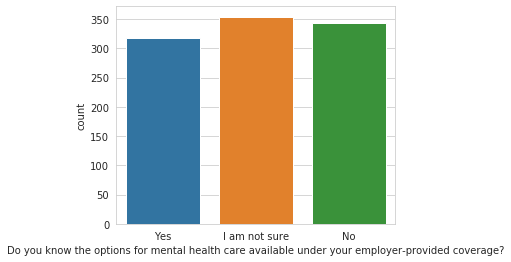

In [34]:
survey16.fillna(method='ffill',inplace=True)
survey16.fillna(value='Yes', limit=1,inplace=True)
#print survey16['Do you know the options for mental health care available under your employer-provided coverage?']
g = sns.countplot(x='Do you know the options for mental health care available under your employer-provided coverage?',data=survey16)

In [35]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [36]:
print_full(survey16.isnull().sum())
# all survey16's null value is addressed

How many employees does your company or organization have?                                                                                        0
Is your employer primarily a tech company/organization?                                                                                           0
Does your employer provide mental health benefits as part of healthcare coverage?                                                                 0
Do you know the options for mental health care available under your employer-provided coverage?                                                   0
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?            0
Does your employer offer resources to learn more about mental health concerns and options for seeking help?                                       0
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resour

In [37]:
for index,val in enumerate(real_features):
    p=survey16[val].unique()
    print(index,val)
    print(p)
    print('\n')

0 How many employees does your company or organization have?
['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']


1 Is your employer primarily a tech company/organization?
[1. 0.]


2 Does your employer provide mental health benefits as part of healthcare coverage?
['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]


3 Do you know the options for mental health care available under your employer-provided coverage?
['Yes' 'I am not sure' 'No']


4 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
['No' 'Yes' "I don't know"]


5 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
['No' 'Yes' "I don't know"]


6 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
["I don't know" 'Yes' 'No']


7 If a mental health issue prompted you to reque

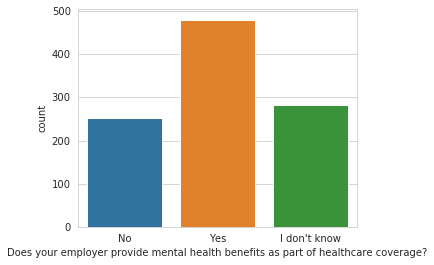

In [38]:
survey16['Does your employer provide mental health benefits as part of healthcare coverage?'] = survey16['Does your employer provide mental health benefits as part of healthcare coverage?'].replace('Not eligible for coverage / N/A','No')
g = sns.countplot(x='Does your employer provide mental health benefits as part of healthcare coverage?',data=survey16)

In [39]:
survey16['How many employees does your company or organization have?'] = survey16['How many employees does your company or organization have?'].replace('1-5', 5)
survey16['How many employees does your company or organization have?'] = survey16['How many employees does your company or organization have?'].replace('6-25',25)
survey16['How many employees does your company or organization have?'] = survey16['How many employees does your company or organization have?'].replace('26-100', 100)
survey16['How many employees does your company or organization have?'] = survey16['How many employees does your company or organization have?'].replace('100-500',500)
survey16['How many employees does your company or organization have?'] = survey16['How many employees does your company or organization have?'].replace('500-1000',1000)
survey16['How many employees does your company or organization have?'] = survey16['How many employees does your company or organization have?'].replace('More than 1000',5000)
survey16['How many employees does your company or organization have?'] = survey16['How many employees does your company or organization have?'].replace(np.nan,5)
# Replacing NaN values wd range 26-100

## Data Visualisation

#### Age Distribution
Overall, the survey in 2016 have wider range of age and higher values, compared to the survey in 2014
Assumption: same people can fill the questionnaire both in 2014 and 2016

Text(0, 0.5, 'Freq')

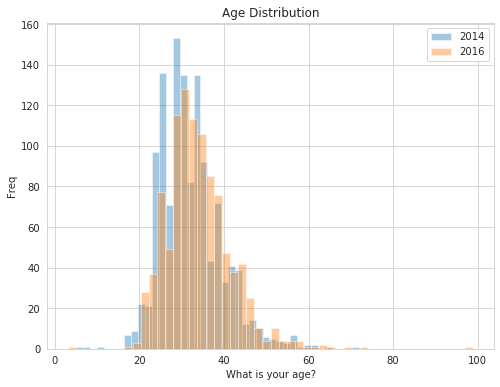

In [40]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(survey14['Age'].dropna(),ax=ax,kde=False)
sns.distplot(survey16['What is your age?'].dropna(), ax=ax, kde=False)
ax.legend(['2014','2016'])
plt.title('Age Distribution')
plt.ylabel('Freq')

# in 2016 overall age in 2016 is older than in 2014, distribution of age in 2016 is more spread than in 2014. It may mean some people can fill the questionnaire twice.

#### Country
Both surveys in 2014 and 2016, top 5 respondents' countries are United State, United Kingdom, Canada, Germany, and Netherlands, respectively.

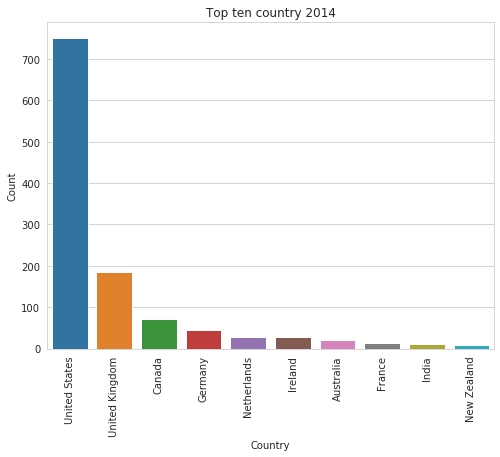

In [41]:
country_count = Counter(survey14['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country 2014')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

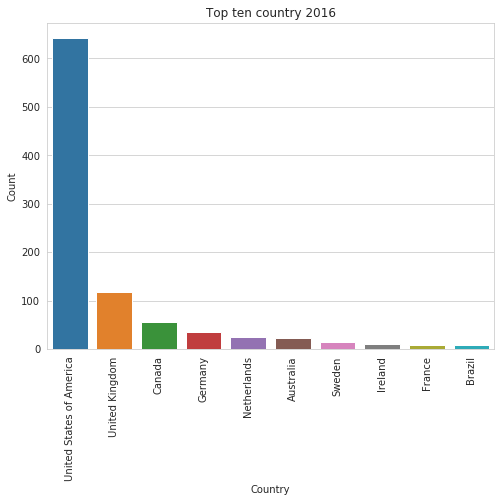

In [42]:
country_count = Counter(survey16['What country do you work in?'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country 2016')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

#### Gender
The majority, more than 90%, of respondents' gender is male, following by female and transgender.

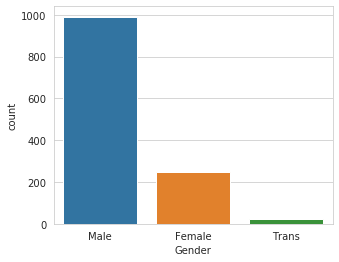

In [43]:
g = sns.countplot(x = 'Gender', data = survey14, order=['Male','Female','Trans'])

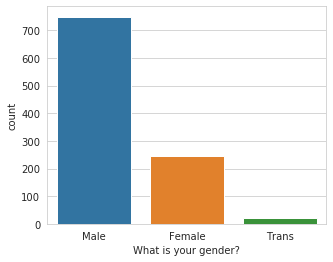

In [44]:
g = sns.countplot(x = 'What is your gender?', data = survey16)

#### Distribution of Dianosed mental condition by medical professional
Both in year 2014 and 2016, the answers is around 50%-50%.

Text(0.5, 1.0, 'Total Distribuition by treated or not 2014')

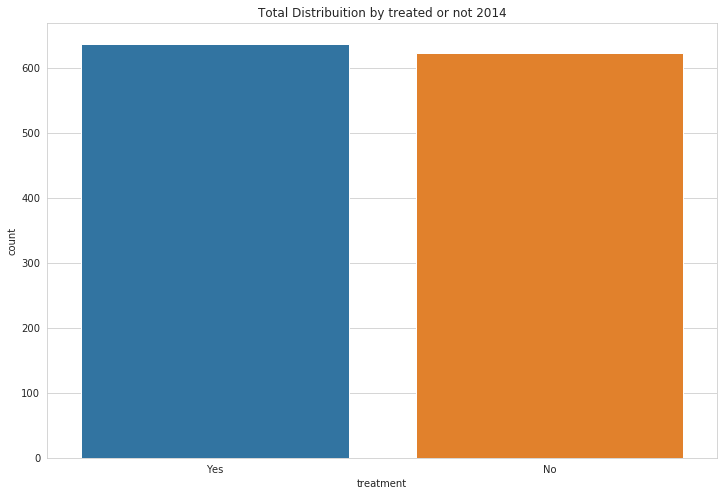

In [45]:
# Let see how many people has been treated
plt.figure(figsize=(12,8))
g = sns.countplot(x="treatment", data=survey14)

plt.title('Total Distribuition by treated or not 2014')

Text(0.5, 1.0, 'Distribution of Dianosed with Mental Health Condition by Medical Professional 2016')

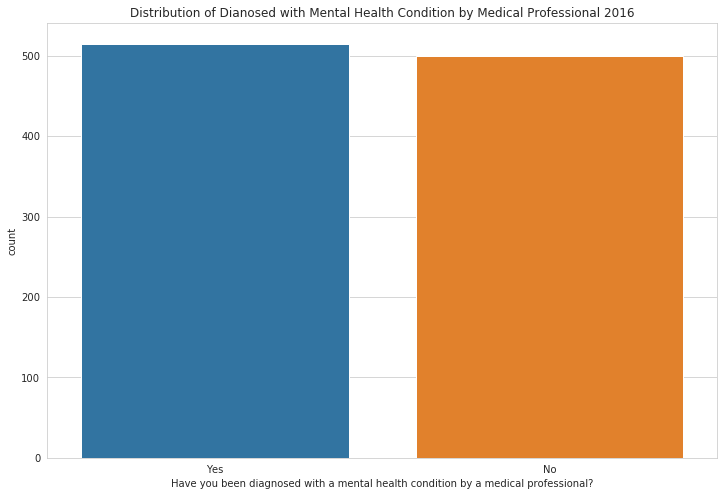

In [46]:
plt.figure(figsize=(12,8))
g = sns.countplot(x="Have you been diagnosed with a mental health condition by a medical professional?", data = survey16)
plt.title('Distribution of Dianosed with Mental Health Condition by Medical Professional 2016')

In 2014, women are more likely to have treatment than not to have treatment.
Men are less likely to have treatment than not have treatment.
Transgender is more likely to have treatment than not to have treatment.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


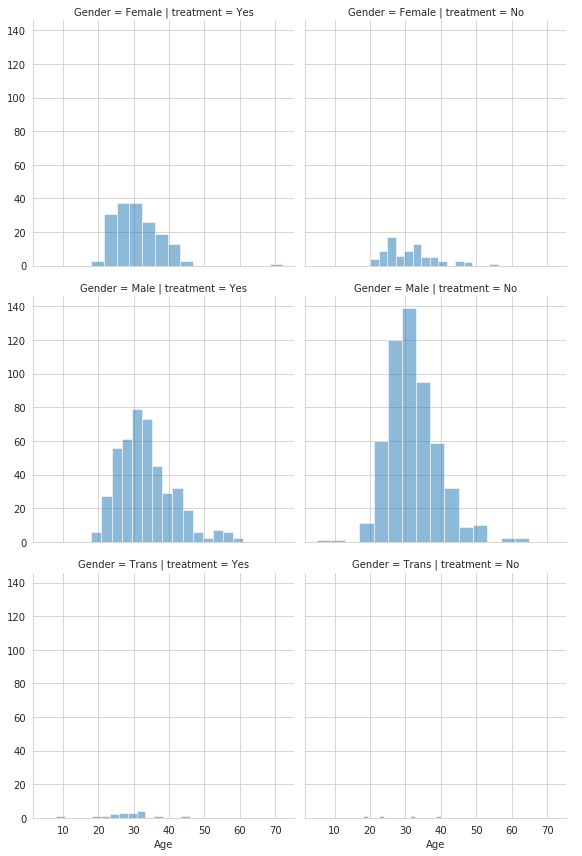

In [47]:
g = sns.FacetGrid(survey14, row='Gender', col='treatment', size=4)
g.map(plt.hist, 'Age', alpha=0.5, bins=15)
g.add_legend()
plt.show()

## Analysis
I choose to analyse for the year 2016 because in survey 2016 have many kinds of questions that can analyse attitude easily.

In [48]:
numeric = {real_features[2]:     {'No':0, 'Yes':1, "I don't know":2},
                real_features[3]: {'Yes':1, 'I am not sure':2, 'No':0},
                 real_features[4]:{'No':0, 'Yes':1, "I don't know":2},
                  real_features[5]:{'No':0, 'Yes':1, "I don't know":2},
                   real_features[6]:{"I don't know":2, 'Yes':1, 'No':0},
                    real_features[7]:{'Very easy':0 ,'Somewhat easy':1, 'Neither easy nor difficult':2,'Very difficult':-1,
 'Somewhat difficult':-2, "I don't know":2}, #### MODIFIED DIRECTLY
                real_features[8]:{'No':0, 'Maybe':2, 'Yes':1},
                real_features[9]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[10]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[11]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[12]:{"I don't know":2, 'Yes':1, 'No':0},
                 real_features[13]:{'No':0, 'Yes':1},
                 real_features[14]:{'No, none did':0, 'Yes, they all did':1, "I don't know":2, 'Some did':3},
                 real_features[15]:{'N/A (not currently aware)':0, 'I was aware of some':1,
 'Yes, I was aware of all of them':1, 'No, I only became aware later':0},  ### MODIFIED DIRECTLY
                real_features[16]:{"I don't know":2, 'None did':0, 'Some did':3,'Yes, they all did':1},
                real_features[17]:{'None did':0, 'Some did':3, 'Yes, they all did':1},
                real_features[18]:{"I don't know":2, 'Yes, always':1, 'Sometimes':3, 'No':0},
                real_features[19]:{'Some of them':3, 'None of them':0, "I don't know":2, 'Yes, all of them':1},
                real_features[20]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
                real_features[21]:{'Some of my previous employers':3, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
                real_features[22]:{'Some of my previous employers':3, "I don't know":2, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
                real_features[23]:{"I don't know":2, 'Some did':3, 'None did':0, 'Yes, they all did':1},
                real_features[24]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
                real_features[25]:{'Maybe':2, 'Yes':1, 'No':0},
                real_features[26]:{'Maybe':2, 'Yes':1, 'No':0},
                real_features[27]:{'Maybe':2, "No, I don't think it would":0, 'Yes, I think it would':1,
 'No, it has not':0, 'Yes, it has':1},  ### MODIFIED DIRECTLY
                real_features[28]:{"No, I don't think they would":0, 'Maybe':2, 'Yes, they do':1,'Yes, I think they would':1, 'No, they do not':0},  ## MODIFIED DIRECTLY
                real_features[29]:{'Somewhat open':1, 'Not applicable to me (I do not have a mental illness)':4,
 'Very open':2, 'Not open at all':-2 ,'Neutral':0, 'Somewhat not open':-1}, ### MODIFIED DIRECTLY
                real_features[30]:{'No':0, 'Maybe/Not sure':2, 'Yes, I experienced':1, 'Yes, I observed':1},
                real_features[31]:{'No':0, 'Yes':1, "I don't know":2},
                real_features[32]:{'Yes':1, 'Maybe':2, 'No':0},
                real_features[33]:{'Yes':1, 'Maybe':2, 'No':0},
                real_features[34]:{'Yes':1, 'No':0},
                real_features[36]:{'Not applicable to me':4, 'Rarely':0, 'Sometimes':3, 'Never':0, 'Often':1},
                real_features[37]:{'Not applicable to me':4, 'Sometimes':3, 'Often':1, 'Rarely':0, 'Never':0},
                real_features[39]:{'Male':0, 'Female':1, 'Trans':2},
                real_features[41]:{'Sometimes':3, 'Never':0, 'Always':1}
          }

In [49]:
country=(survey16[real_features[40]].unique())
num_rep=[]    #numeric representation with there index
alp_rep=[]    # name of country
#print(type(country))
for index,val in enumerate(country):
    num_rep.append(index)
    alp_rep.append(val)
print(len(num_rep),len(alp_rep))
survey16[real_features[40]].replace(alp_rep, num_rep,inplace=True)  # Replacing country name with the index

42 42


In [50]:
survey16.replace(numeric, inplace=True)
survey16.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Do you work remotely?
0,100,1.0,0,1,0,0,2,0,0,0,...,1,0,1,0,4,4,39.0,0,0,3
1,25,1.0,0,1,1,1,1,1,0,0,...,1,1,1,1,0,3,29.0,0,1,0
2,25,1.0,0,1,0,0,2,2,2,0,...,2,0,0,1,4,4,38.0,0,0,1
4,25,0.0,1,1,0,0,0,2,1,2,...,1,1,1,1,3,3,43.0,1,1,3
5,5000,1.0,1,2,0,1,1,1,1,1,...,0,1,0,1,4,1,42.0,0,0,3


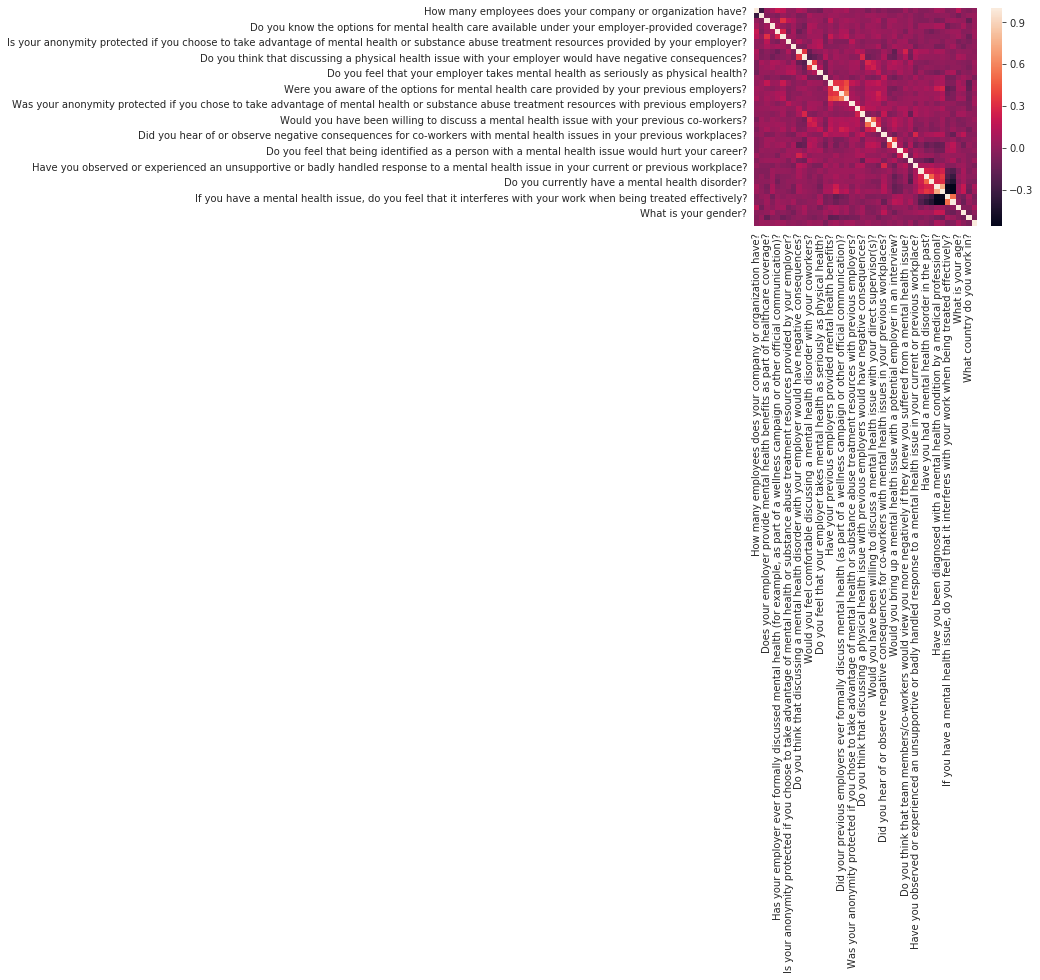

In [51]:
#checking for independence between features
sns.heatmap(survey16.corr())

In [52]:
# "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?" have high dependent with other variable, so I will drop this one
survey16.drop(['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?', ], axis =1, inplace = True)

In [53]:
#check again that dataset size is sufficient
survey16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1431
Data columns (total 41 columns):
How many employees does your company or organization have?                                                                                        1015 non-null int64
Is your employer primarily a tech company/organization?                                                                                           1015 non-null float64
Does your employer provide mental health benefits as part of healthcare coverage?                                                                 1015 non-null int64
Do you know the options for mental health care available under your employer-provided coverage?                                                   1015 non-null int64
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?            1015 non-null int64
Does your employer offer resources to learn more about mental

In [54]:
X_train, X_test, y_train, y_test = train_test_split(survey16.drop('Have you been diagnosed with a mental health condition by a medical professional?', axis=1),
                                                   survey16['Have you been diagnosed with a mental health condition by a medical professional?'], test_size=0.2,
                                                   random_state=200)

In [55]:
print(X_train.shape)
print(y_train.shape)

(812, 40)
(812,)


In [56]:
X_train[0:5]

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Do you work remotely?
1383,500,1.0,0,0,0,0,1,1,0,0,...,0,0,1,2,0,1,30.0,0,40,3
831,5000,1.0,1,2,0,2,2,1,0,0,...,0,1,1,1,0,3,30.0,1,1,3
955,500,1.0,0,0,0,0,2,2,1,0,...,2,0,1,0,1,0,33.0,0,34,0
361,1000,1.0,1,0,0,2,2,1,2,2,...,1,1,1,1,1,1,31.0,1,1,1
889,100,0.0,2,2,1,0,2,1,0,0,...,1,0,1,1,1,1,51.0,0,1,3


In [57]:
LogReg = LogisticRegression(solver = 'liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
X = survey16.drop('Have you been diagnosed with a mental health condition by a medical professional?', axis=1)
y = survey16['Have you been diagnosed with a mental health condition by a medical professional?']
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.320007
         Iterations 7
                                                           Logit Regression Results                                                          
Dep. Variable:     Have you been diagnosed with a mental health condition by a medical professional?   No. Observations:                 1015
Model:                                                                                         Logit   Df Residuals:                      975
Method:                                                                                          MLE   Df Model:                           39
Date:                                                                               Thu, 23 Apr 2020   Pseudo R-squ.:                  0.5383
Time:                                                                                       21:23:26   Log-Likelihood:                -324.81
converged:                                    

##### Attitude that significance at 95% interval
- positive effect
    - Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
    - Have you ever sought treatment for a mental health issue from a mental health professional?     
    - What is your gender?
    - Do you work remotely?                                                                                           
- negative effect
    - Does your employer provide mental health benefits as part of healthcare coverage?
    - Do you feel that your employer takes mental health as seriously as physical health?
    - Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
    - Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue? 
    - What is your age?                                                                                         

##### Meaning of finding

- if respondents face negative consequence from co-worker with mental health issues in previous workplaces, they will have higher chance to have mental health diagnosed by medical professional.
- if respondents ever sought treatment for a mental health issue from a mental health professional, they will have higher chance to have mental health diagnosed by medical professional.
- if respondents is female or trans, they will have more chance to have mental health diagnosed by medical professional.
- if respondents work remotely, they will have higher chance to have mental health diagnosed by medical professional.

- if employer provide mental health benefits as part of healthcare coverage to respondents, respondents will have less chance to have mental health disorder.
- if employer takes mental health as seriously as physical health to respondents, they will have lower chance to have mental health dianosed by medical professional.
- if respondents think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue, they will have less chance to have mental health dianosed by medical professional.
- if respondents have higher age, they will have less chance to have mental health dianosed by medical professional.

#### Predictive Model

In [59]:
y_pred = LogReg.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       101
           1       0.85      0.90      0.88       102

    accuracy                           0.87       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203



In [61]:
# k-fold cross-validation and confusion matrices
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[324,  75],
       [ 44, 369]])

In [62]:
precision_score(y_train, y_train_pred)

0.831081081081081

## Business Insight
#### Answer to concerns
How does the frequency of mental health illness and attitudes towards mental vary by geographic location, and what are the strongest predictors of mental health illness and specific attitudes towards mental health in the workplace?
I make prediction using logistic regression and rate of correct is about 84%.
- Around half of respondents have mental health condition.
- Location is not affect mental health illness of responses. It is because most of the respondents is in the United State and hard to compared with other countries.
- The strongest attitude that affects mental health: mental health benefits by employers, sought treatment before, work remotely, the previous co-worker have mental health, thought about look bad in the view of a co-worker, gender, age

#### Business insight
    For individuals, higher age people have less opportunity to have mental health 
    Employers play important roles to prevent mental health of employees by providing mental health benefits and taking mental health illness seriously as physical health illness. Moreover, co-workers are also the mental health illness of their colleagues. 

#### Limitation:
- I am more focus on the survey 2016 because there are many question that can be attitude that influence the mental health disorder
- Year can be one of the predictor of mental health disorder >> It is can make panel analysis
- The questions when generate questionnaire is reasonable, but the way to generate form for respondents to fill is not reasonably, such as gender of respondents
- There are also other types of analysis that worth to try to see what models are match best with data.

# Question 3: What were the top Australian news topic over the last decade, and what can these say about the national conversation?

The data is the headlines of ABC news

Stakeholder: news reader, journalist, news company, government

### Data Cleaning and Visualisation

In [1]:
from collections import Counter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

data = pd.read_csv("abcnews-date-text.csv",error_bad_lines=False,usecols =["publish_date","headline_text"])
data = data[data.publish_date >= 20090101].reset_index()
cnt = Counter()
data_new = data[data['headline_text'].notnull()]

In [2]:
data_new.head()

,index,publish_date,headline_text
0,433861,20090101,2008 deadliest year for us forces in afghanistan
1,433862,20090101,2008 dubbed wet year for hunter
2,433863,20090101,2 israelis injured in danish mall shooting
3,433864,20090101,8500 qld homes without power after storms
4,433865,20090101,about 60 killed in bankgok fire


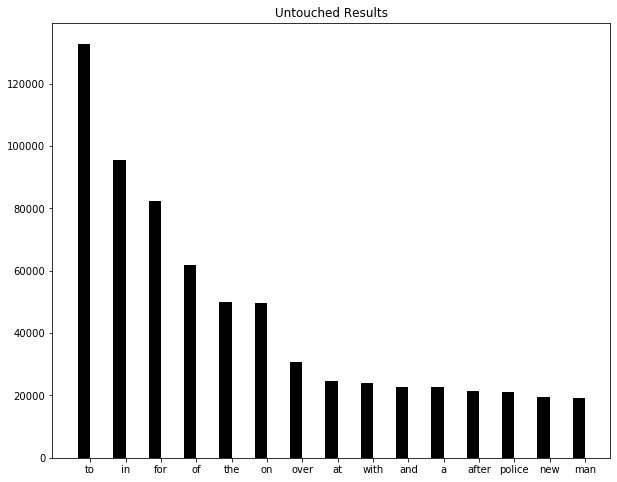

In [3]:
for x in data_new["headline_text"]:
    items = x.split(" ")
    for y in items:
        cnt[y]+=1
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ind = np.arange(15)  # the x locations for the groups
width = 0.35       # the width of the bars
first10keys = [k for k in sorted(cnt,key = cnt.get,reverse = True)[:15]]
first10vals = [k for k in sorted(cnt.values(),reverse = True)[:15]]
rects1 = ax.bar(ind, first10vals, width,
                color='black')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(first10keys)
ax.set_title("Untouched Results")
plt.show()

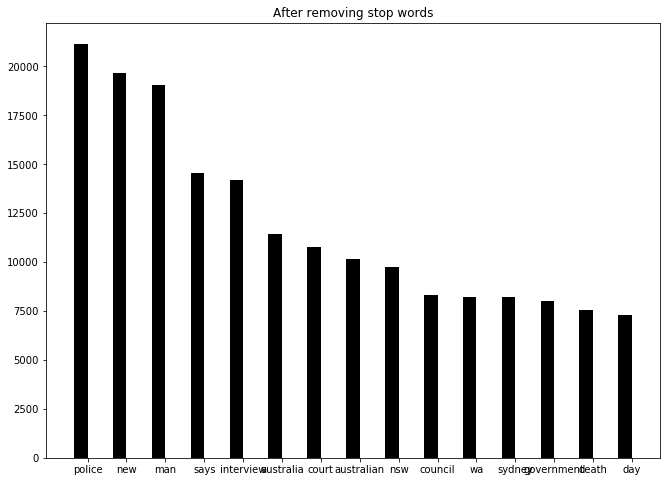

10597123_Assignment1_partB.ipynb
abcnews-date-text.csv
survey_2014.csv
survey_2016.csv
Untitled.ipynb



In [4]:
#Filtering stop words
unwanted = ("a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the");
for k in unwanted:
    del cnt[k]

fig2 = plt.figure(figsize=(11,8))
ax2 = fig2.add_subplot(111)
first15keys2 = [k for k in sorted(cnt,key = cnt.get,reverse = True)[:15]]
first15vals2 = [k for k in sorted(cnt.values(),reverse = True)[:15]]
rects2 = ax2.bar(ind, first15vals2, width,
                color='black')
ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels(first15keys2)
ax2.set_title("After removing stop words")
plt.show()

from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

## Business Insight

#### Top 15 words from ABC news headline over the last decade
1. police
2. new
3. man
4. says
5. interview
6. australia
7. court
8. australian
9. nsw
10. council
11. wa
12. sydney
13. government
14. death
15. day

#### Most frequence categories:
1. Law enforcement: police, court, government
2. Simple word: new, man
3. Speech: says, interview >> it may come from celebrities and politician
4. Death
5. Nationality and location : australia, australian, nsw, wa, sydney

As ABC News is an Australian news company, so many news headlines are inside Australia, about Australian. The states in Australia mostly in the news is New South Wales(NSW) and Western Australian (WA), respectively. Moreover, Sydney is the most frequence in the ABC news. The top frequency news headline is about the police. Law enforcement is the main topic to talk about in the news. For example, police arrest someone who kills others. The court may sentence someone who commits criminal. The government may create new laws and policies. Death is reported by the cause of death such as crime and disease. A normal word like "man" would mean male people or general people, and new that may come from sometimes new like a new smartphone. Speech is another category that easily sees on news, which includes "says" and "interview". For example, celebrities or politicians say somethings. There is an interview about those people.


#### Limitation
- time constaint
- my ability to analyse text, need more analysis. Apply another technique to understand more, make further analysis.
- my computer performance >> i can not use the code from lecture 2B because it wait to run for a long time


Source: Many website I been though
Overall understanding:https://towardsdatascience.com/data-and-mental-health-the-osmi-survey-2016-39a3d308ac2f

Logistic regression: https://towardsdatascience.com/binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation-49b025f1b510

Coding:
https://www.kaggle.com/h1rshit/preprocessing-and-random-forest-with-87-accuracy
https://www.kaggle.com/richel145/analysis-of-a-million-news-headlines

Lecture Jupyter notebook

Thank you for lectures' videos, coding YouTube, stackoverflow, and online course.